# **Machine Learning Regression Model: Prediksi Harga Apartemen Daegu**
---
**Author: Fatimah Azzahra, Gabriella Davintia, Tengku Arika Hazera**


 Model prediksi Machine Learning menggunakan sumber data [apartemen daegu](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx).

### **Contents**

1. Business Problem Understanding
2. Library and Read Data
3. Data Understanding
4. Data Preprocessing
5. Modeling
6. Conclusion
7. Recommendation

****

## 1. Business Problem Understanding

### 1.1 Context

Apartemen merupakan salah satu jawaban atas kebutuhan hunian masyarakat modern akibat keterbatasan lahan permukiman dan padatnya aktivitas bisnis di kawasan perkotaan. Oleh karena itu, menarik untuk mengkaji harga apartemen yang dipengaruhi oleh berbagai faktor internal dan eksternal.


### 1.2 Problem Statement

Apartemen di daerah Daegu (Korea Selatan) menjadi salah satu pilihan tempat tinggal penduduk setempat akibat keterbatasan lahan dan tingginya kepadatan penduduk. Harga apartemen dipengaruhi oleh berbagai faktor internal seperti tipe apartemen, luas unit, dan usia bangunan, serta faktor eksternal seperti lokasi dan fasilitas di sekitarnya. Dalam praktiknya, pemilik apartemen atau perusahaan sering menetapkan harga berdasarkan pertimbangan pribadi, sehingga sulit untuk menyesuaikan dengan kondisi pasar. Penetapan harga yang terlalu tinggi dapat menyebabkan unit sulit terjual, sedangkan harga yang terlalu rendah dapat mengakibatkan kerugian finansial.

### 1.3 Goals

1. Menganalisis faktor internal dan eksternal utama yang memengaruhi harga apartemen di Daegu menggunakan data historis apartemen.

2. Membangun model machine learning berbasis regresi yang mampu memprediksi harga apartemen berdasarkan karakteristik properti dan fitur yang berkaitan dengan lokasi.

3. Meningkatkan akurasi penetapan harga dengan menyediakan estimasi harga yang objektif dan berbasis data sehingga mencerminkan kondisi pasar saat ini.

### 1.4 Analytical Approach

**1. Data Understanding**

Menggunakan data historis transaksi apartemen di Daegu yang mencakup harga sebagai variabel target serta berbagai fitur internal dan eksternal seperti luas unit, usia bangunan, lokasi, dan fasilitas di sekitar.

**2. Exploratory Data Analysis (EDA)**

Menganalisis distribusi data, korelasi, dan hubungan antara fitur dengan harga apartemen untuk mengidentifikasi faktor-faktor yang paling berpengaruh.

**3. Data Preprocessing**

 Dataset di split menjadi data train dan test. Variabel kategorikal dikodekan, fitur numerik dinormalisasi atau diskalakan jika diperlukan.

**4. Model Development**

Membangun dan membandingkan beberapa model regresi, seperti `Linear Regression`, `Ridge Regression`, `Lasso Regression` serta model yang lebih kompleks seperti `Gradient Boosting Regression` atau `XGB Regression` sebagai baseline model.

**5. Model Training and Validation**

Membagi data menjadi data latih dan data uji atau menggunakan cross-validation untuk memastikan model dapat melakukan generalisasi dengan baik.

**6. Model Selection and Optimization**

Mengevaluasi kinerja model, melakukan tuning hyperparameter, dan memilih model terbaik berdasarkan hasil evaluasi.

**7. Interpretation Model**

Menjelaskan faktor-faktor apa saja dalam model  yang mempengaruhi prediksi harga apartemen.

### 1.5 Metric Evaluation

Karena menggunakan model regresi, maka metrik evaluasi yang digunakan adalah:

**1. Mean Absolute Error (MAE):** Mengukur rata-rata selisih absolut antara harga prediksi dan harga aktual, sehingga mudah diinterpretasikan dalam satuan harga.

**2. Root Mean Squared Error (RMSE):** Memberikan penalti lebih besar pada kesalahan prediksi yang besar, sehingga cocok untuk meminimalkan kesalahan harga yang ekstrem.

**3. R-squared (R²):** Menunjukkan seberapa besar variasi harga apartemen dapat dijelaskan oleh model. Nilai yang lebih tinggi menunjukkan performa model yang lebih baik.

**4. Mean Absolute Percentage Error (MAPE):** Mengukur rata-rata kesalahan prediksi dalam bentuk persentase terhadap harga aktual, sehingga mudah dipahami sebagai tingkat kesalahan relatif model.

### 1.6 Stakeholder

Pemangku kebijakan yang berpengaruh terhadap hasil dari prediksi apartemen diantaranya sebagai berikut:
1. Investor/Pemilik Unit Apartemen
2. Pembeli Apartemen
3. Marketing Team.

### 1.7 5-Point Business ML Goals

1.  **Problem :**
  Terbatasnya lahan tidak sebanding dengan pertumbuhan penduduk sehingga muncullah apartemen sebagai solusi hunian di zaman modern ini.
2.  **Data :**
    Menggunakan data historis transaksi apartemen di Daegu.
3.  **ML Objective :**
    Membangun model regresi untuk memprediksi harga apartemen di Daegu berdasarkan faktor internal dan eksternal suatu unit.
4.  **Action :**
    Menjadikan hasil prediksi sebagai referensi, dasar atau acuan dalam penetapan harga apartemen saat ingin melakukan transaksi.
5.  **Value :**
    Meminimalisasi kekeliruan penetapan harga saat ingin menjual apartemen bagi pemilik unit. Adapun untuk pembeli apartemen, pembeli dapat mengetahui pasaran harga apartemen sebelum membeli suatu unit apartemen. Tim marketing dapat menyarankan unit dengan tepat sesuai kebutuhan dan budget yang dimiliki customer.

---


## 2. Library and Read Data

In [419]:
pip install category_encoders

In [420]:
# Library

import pandas as pd
import numpy as np
import time
from scipy.stats import randint, uniform

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Random State
RANDOM_STATE=42


In [421]:
#Load Dataset
df = pd.read_csv("/content/data_daegu_apartment.csv")
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


## 3. Data Understanding

### 3.1 Data Dictionary

In [422]:
# Mengecek ukuran dataset serta format type data pada setiap kolom
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (4123, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4),

- Dataset merupakan data listing Apartment di kota Daegu, Korea Selatan.
- Dataset memiliki 4123 baris data dengan 11 Kolom informasi.
- Setiap baris data merepresentasikan informasi terkait fasilitas dan kondisi tiap unit apartment.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType                        | Object | Tipe Apartment|
|TimeToSubway                      | Object | Waktu yang dibutuhkan ke stasiun subway terdekat |
| SubwayStation                      | Object | Nama stasiun subway terdekat |
| N_FacilitiesNearBy(ETC)  | Float |Jumlah fasilitas terdekat|
|N_FacilitiesNearBy(PublicOffice) | Float | Jumlah fasilitas berupa kantor publik terdekat |
| N_SchoolNearBy(University)  | Float | Jumlah universitas terdekat|
| N_Parkinglot(Basement)  | Float | Jumlah slot parkir basement dalam suatu gedung apartemen |
| YearBuilt                          | Integer | Tahun apartment saat dibangun |
| N_FacilitiesInApt                  | Integer | Jumlah fasilitas umum di dalam apartment |
|  Size(sqf)  | Integer | Ukuran unit apartment dalam satuan square feet |
| SalePrice  | Integer | Harga unit apartment dalam satuan Won |


### 3.2 Missing Value dan Duplikat

In [423]:
# Cek Missing Value
df_null=pd.DataFrame(df.isna().sum()).reset_index().rename(columns={'index':'Column',0:'Count Missing'})
df_null['Percentage Missing']=(round(100*df.isna().sum()/len(df),2)).reset_index(drop=True)
df_null

,Column,Count Missing,Percentage Missing
0,HallwayType,0,0.0
1,TimeToSubway,0,0.0
2,SubwayStation,0,0.0
3,N_FacilitiesNearBy(ETC),0,0.0
4,N_FacilitiesNearBy(PublicOffice),0,0.0
5,N_SchoolNearBy(University),0,0.0
6,N_Parkinglot(Basement),0,0.0
7,YearBuilt,0,0.0
8,N_FacilitiesInApt,0,0.0
9,Size(sqf),0,0.0


In [424]:
#cek data duplikat
persentase_duplikat=(df.duplicated().sum()/len(df))
print(f"Total baris duplikat yang ditemukan: {df.duplicated().sum()} baris atau sebanyak {persentase_duplikat:.2%} dari total data.")

Total baris duplikat yang ditemukan: 1422 baris atau sebanyak 34.49% dari total data.


In [425]:
# Cek semua data duplikat
cek_duplikat = df[df.duplicated(keep=False)]
duplikat_sorted = cek_duplikat.sort_values(by=list(df.columns))

print(f"Jumlah total baris yang terlibat dalam duplikasi: {len(duplikat_sorted)}")
print("Contoh data duplikat (atas-bawah harusnya sama persis):")
print(f'Data unik yang terkena duplikasi : {len(duplikat_sorted)-df.duplicated().sum()}')
print(duplikat_sorted.head(6))

# Export ke Excel jika ingin mengecek manual --> sudah dilakukan dan hasilnya sesuai
# duplikat_sorted.to_excel("cek_duplikat.xlsx", index=False)

Jumlah total baris yang terlibat dalam duplikasi: 2100
Contoh data duplikat (atas-bawah harusnya sama persis):
Data unik yang terkena duplikasi : 678
     HallwayType TimeToSubway          SubwayStation  N_FacilitiesNearBy(ETC)  \
385     corridor       0-5min  Kyungbuk_uni_hospital                      0.0   
1428    corridor       0-5min  Kyungbuk_uni_hospital                      0.0   
628     corridor       0-5min  Kyungbuk_uni_hospital                      0.0   
3810    corridor       0-5min  Kyungbuk_uni_hospital                      0.0   
258     corridor       0-5min  Kyungbuk_uni_hospital                      0.0   
2721    corridor       0-5min  Kyungbuk_uni_hospital                      0.0   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
385                                3.0                         2.0   
1428                               3.0                         2.0   
628                                3.0                         2.0   
38


Ditemukan 1422 baris data duplikat dan tidak terdapat missing value pada data.
Setelah dilakukan pengecekan terdapat 2100 data yang terlibat duplikasi dengan 678 data yang unik, sehingga 1422 baris data memang benar merupakan data duplikat namun kita tidak memiliki informasi id pemilik apartment untuk membedakan apakah data berasal dari pemilik yang sama atau berbeda, **sehingga langkah yang diambil adalah tidak dilakukan penghapusan data duplikat.**  Karena bisa saja data duplikat tersebut adalah apartment yang berbeda dengan karakteristik yang serupa.

---

### 3.2 Exploratory Data Analysis

In [426]:
# Menampilkan kolom, jumlah data unik dalam kolom, tipe kolom beserta isi dari masing-masing kolom
df_unique = []

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

for i in df.columns:
    unique_count = df[i].nunique()
    unique_values = df[i].unique()
    data_type = df[i].dtype
    df_unique.append({
        "Column Name": i,
        "Number of Unique": unique_count,
        "Data Type": data_type,
        "Unique Sample": unique_values
    })

df_unique = pd.DataFrame(df_unique)
display(df_unique)

,Column Name,Number of Unique,Data Type,Unique Sample
0,HallwayType,3,object,"[terraced, mixed, corridor]"
1,TimeToSubway,5,object,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,object,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,float64,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,float64,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,float64,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,float64,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,int64,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,int64,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,int64,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


#### Data Numerik

In [427]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_FacilitiesNearBy(ETC),4123.0,1.930876,2.198832,0.0,0.0,1.0,5.0,5.0
N_FacilitiesNearBy(PublicOffice),4123.0,4.135338,1.802640,0.0,3.0,5.0,5.0,7.0
N_SchoolNearBy(University),4123.0,2.746301,1.496610,0.0,2.0,2.0,4.0,5.0
N_Parkinglot(Basement),4123.0,568.979141,410.372742,0.0,184.0,536.0,798.0,1321.0
YearBuilt,4123.0,2002.999757,8.905768,1978.0,1993.0,2006.0,2008.0,2015.0
N_FacilitiesInApt,4123.0,5.817851,2.340507,1.0,4.0,5.0,7.0,10.0
Size(sqf),4123.0,954.630851,383.805648,135.0,644.0,910.0,1149.0,2337.0
SalePrice,4123.0,221767.926995,106739.839945,32743.0,144752.0,209734.0,291150.0,585840.0


In [428]:
numerik = df.select_dtypes(include= 'number')

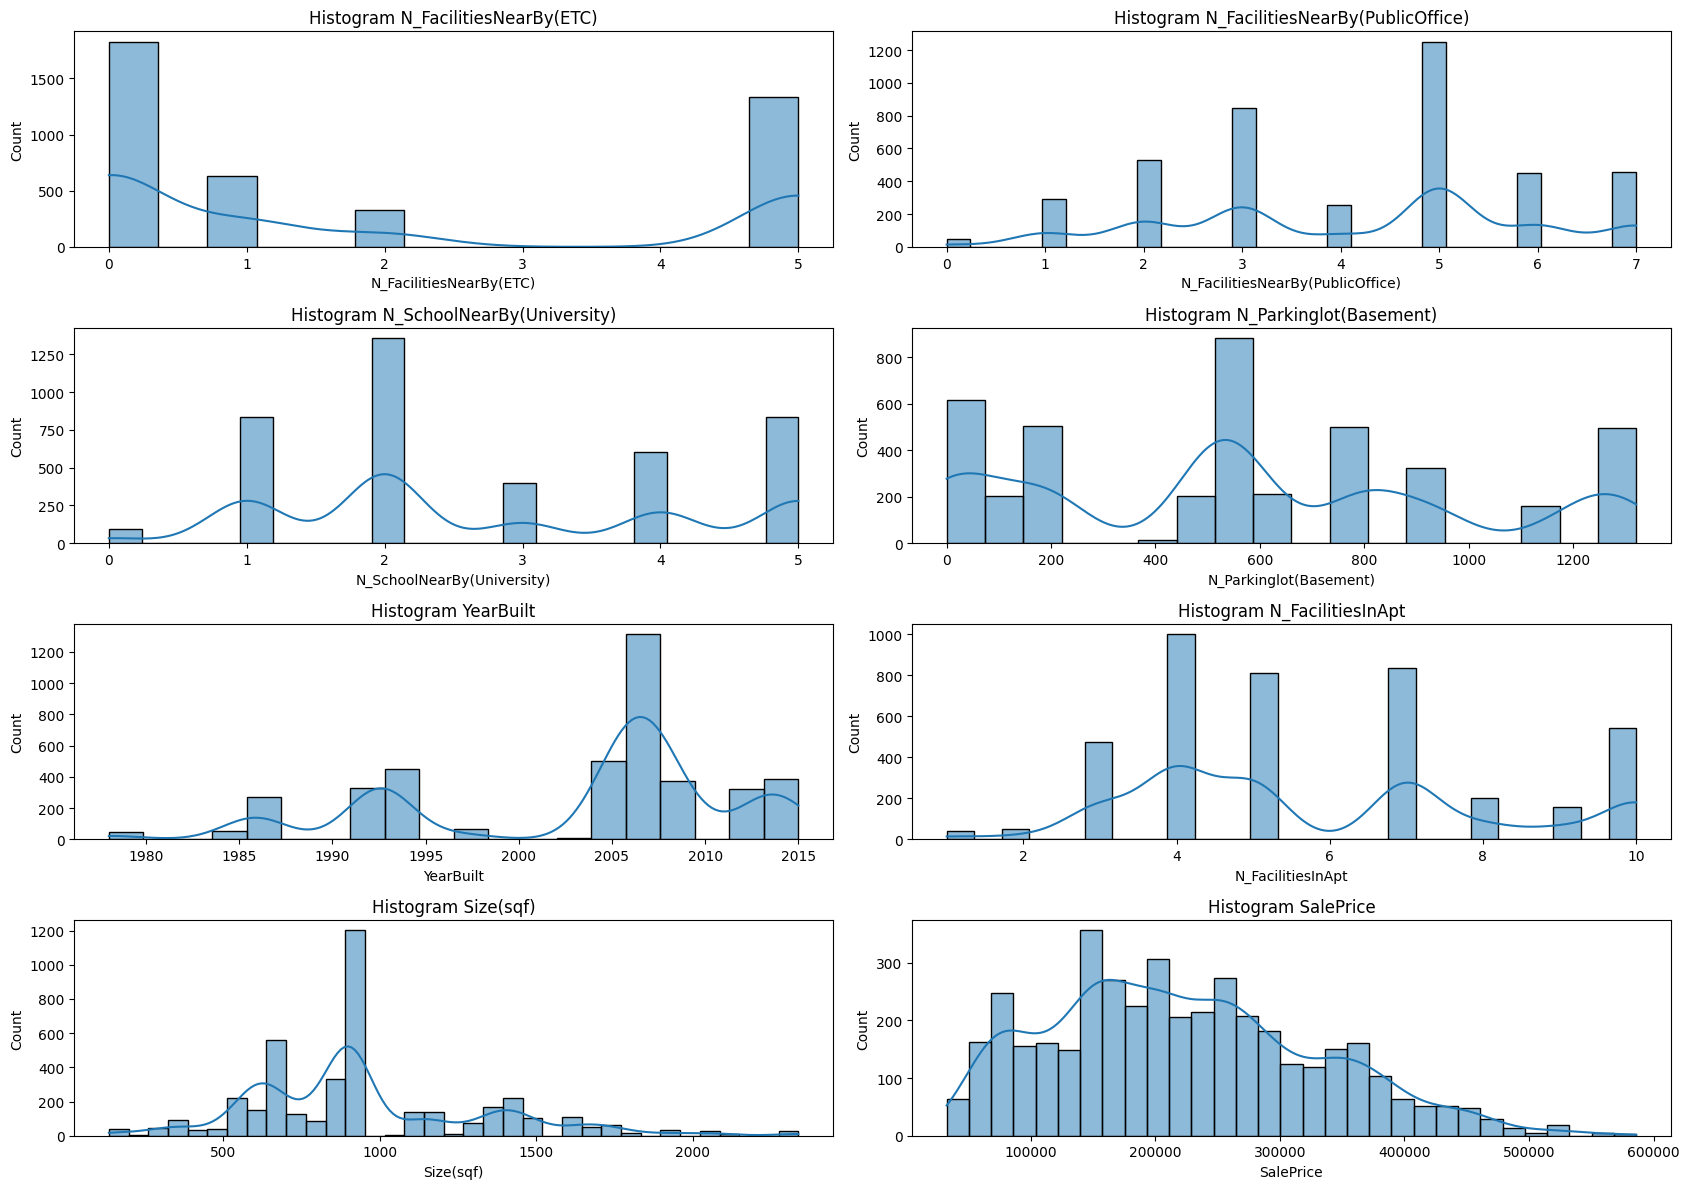

In [429]:
# Histogram Data Numerik
fig = plt.figure(figsize=(17,12))

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"Histogram {kolom}")
    fig.tight_layout()
plt.show()


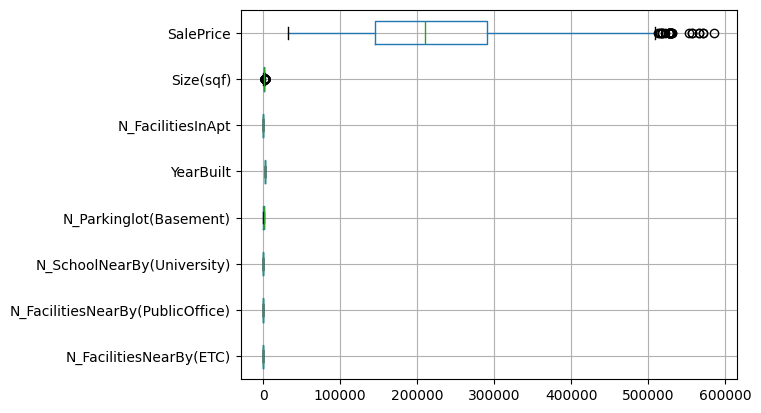

In [430]:
# Plot boxplot untuk mengecek outliers
df.boxplot(vert=False)
plt.show()


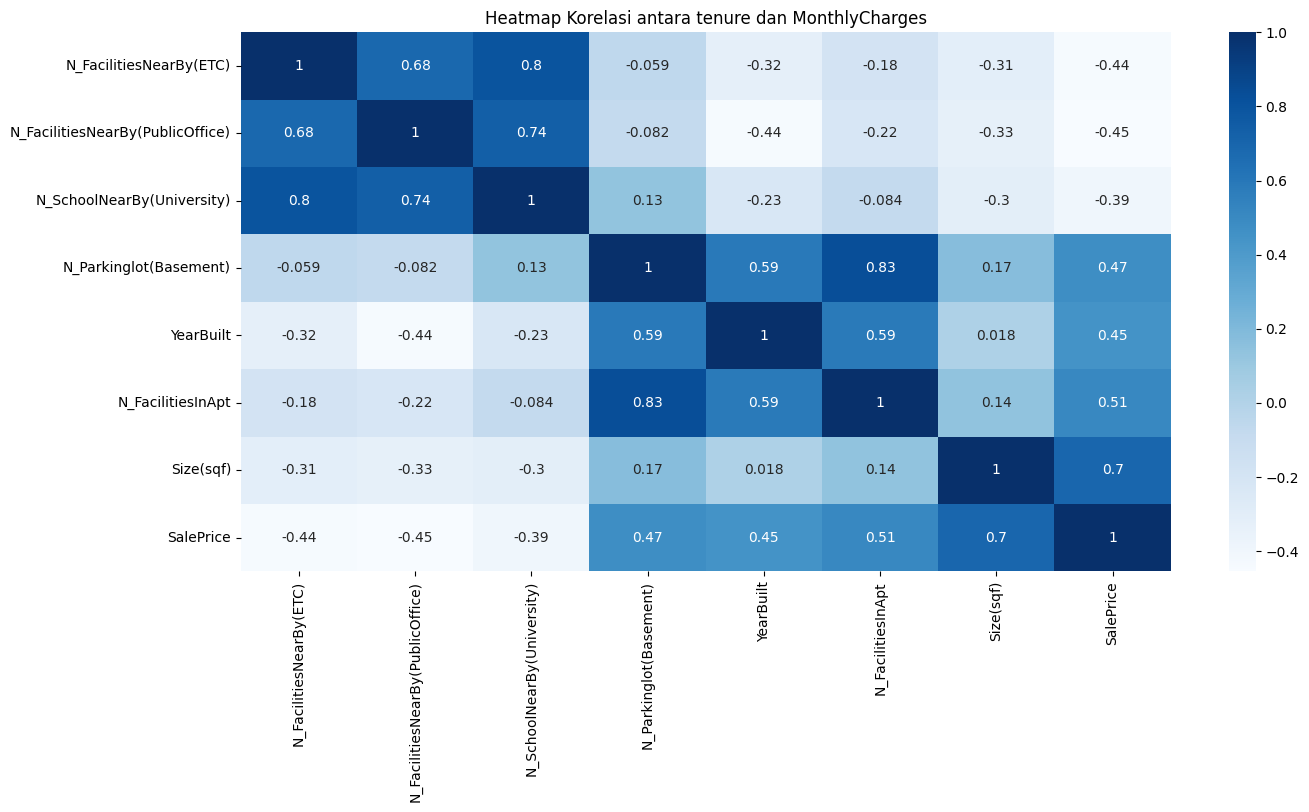

In [431]:
# Cek korelasi antara fitur numerik
df_corr=df[numerik.columns].corr()

plt.figure(figsize = (15,7))
sns.heatmap(data=df_corr, annot=True, cmap='Blues')
plt.title("Heatmap Korelasi antara tenure dan MonthlyCharges")
plt.show()


Data Kategorik

In [432]:
df.describe(include='object').T

,count,unique,top,freq
HallwayType,4123,3,terraced,2528
TimeToSubway,4123,5,0-5min,1953
SubwayStation,4123,8,Kyungbuk_uni_hospital,1152


In [433]:
kategorik = df.select_dtypes(include= 'object')

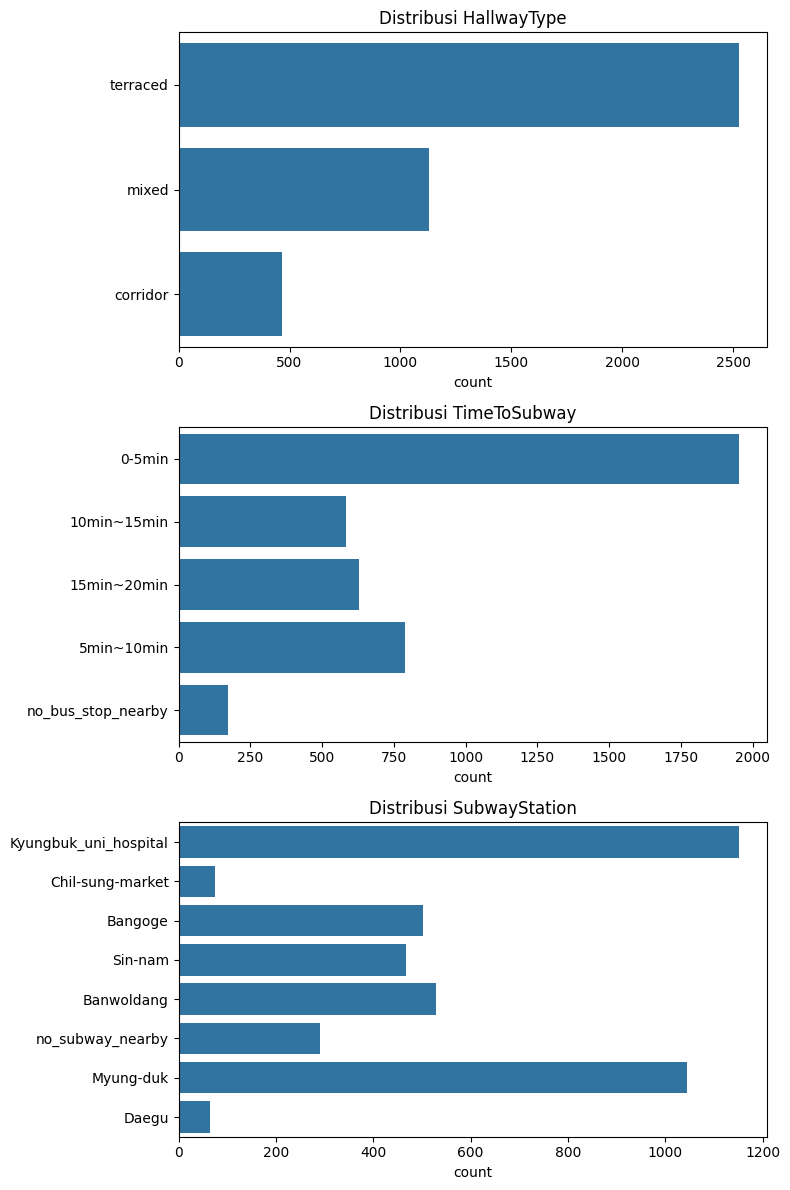

In [434]:
kategori = ['HallwayType', 'TimeToSubway', 'SubwayStation']

fig, axes = plt.subplots(len(kategori), 1, figsize=(8, 4*len(kategori)))

for ax, col in zip(axes, kategori):
    sns.countplot(data=df, y=col, ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


## 4. Data Preprocessing

#### **Data Splitting**

In [435]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

#### **Train and Test Splitting**

In [436]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

####**Encoding - Column Transformer**

In [437]:
categorical_features = kategorik.columns
numerical_features = numerik.columns.drop('SalePrice')

transformer = ColumnTransformer(
    transformers=[
        ('cat_hallway_timetosubway', OneHotEncoder(drop='first', handle_unknown='ignore'),['HallwayType', 'TimeToSubway']),
        ('cat_subway',ce.BinaryEncoder(),['SubwayStation']) #Encoding
    ],
    remainder='passthrough')

## 5. Modeling

#### Benchmarking Model

In [438]:
# Define algoritma yang digunakan
lr = LinearRegression()
rr = Ridge(alpha=0.01)
las = Lasso(alpha=0.01)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_rr = TransformedTargetRegressor(rr, func=np.log, inverse_func=np.exp)
log_las = TransformedTargetRegressor(las, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_rr, log_las, log_gb, log_xgb]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # R2
    model_cv_r2 = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[0.7494944  0.70632055 0.75584679 0.74689665 0.7365968 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-53094.13220124 -56860.30822898 -54738.88069144 -54478.89927029
 -54864.03083921] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42418.99180689 -43525.44400284 -43399.08207437 -43178.2022891
 -43972.79145652] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22782884 -0.2205297  -0.22026028 -0.22855926 -0.22314456] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.7494954  0.70632124 0.75585048 0.7468983  0.73659735] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge(alpha=0.01))


In [439]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regressor', 'Lasso Regressor', 'GradientBoosting Regressor', 'XGB Regressor'],
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_R2,Std_R2,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,0.739031,0.017493,-54807.250246,1205.448739,-43298.902326,510.743516,-0.224065,0.003527
1,Ridge Regressor,0.739033,0.017494,-54807.086097,1205.470019,-43298.868643,510.722984,-0.224065,0.003527
2,Lasso Regressor,0.724057,0.024881,-56324.687242,1831.132519,-44793.127567,746.580065,-0.232818,0.003928
3,GradientBoosting Regressor,0.834765,0.005846,-43634.930832,357.894600,-33999.560445,379.305073,-0.175119,0.005275
4,XGB Regressor,0.833774,0.005450,-43767.322656,315.176641,-33970.932813,269.840829,-0.175267,0.004865


Top 2 models: XGB model dan Gradient Boosting model

**Predict to test set**

In [440]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R2': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,R2,RMSE,MAE,MAPE
XGB,0.843193,41122.361022,32204.324219,0.178031
GradientBoosting,0.841995,41279.140747,32719.357255,0.181330


**Hyperparameter Tuning XGB**

In [441]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

**Benchmark with hyperparameter tuning**

In [442]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state = 42
)

In [443]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_hallway_timetosubway',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['HallwayType',
                                                                                'TimeToSubway']),
                                                                              ('cat_subway',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation'])])),
                                             ('scaler', Standard...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [444]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
16,0.136625,0.010464,0.023911,0.002881,0.5,0.021544,183,3,0.27,5,0.5,"{'model__subsample': 0.5, 'model__reg_alpha': 0.021544346900318832, 'model__n_estimators': 183, 'model__max_depth': 3, 'model__learning_rate': 0.27, 'model__gamma': 5, 'model__colsample_bytree': 0.5}",0.840819,0.835992,0.833069,0.830958,0.835846,0.835337,0.003318,1,-43703.339844,-43353.820312,-43445.718750,-44283.105469,-42994.859375,-43556.168750,428.557728,1,-34199.101562,-34458.167969,-33917.949219,-35370.507812,-34399.605469,-34469.066406,488.702645,1,-0.180920,-0.181352,-0.180441,-0.193949,-0.183005,-0.183934,0.005082,3
19,0.124090,0.002603,0.023273,0.003389,0.5,0.002783,176,3,0.13,10,0.3,"{'model__subsample': 0.5, 'model__reg_alpha': 0.0027825594022071257, 'model__n_estimators': 176, 'model__max_depth': 3, 'model__learning_rate': 0.13, 'model__gamma': 10, 'model__colsample_bytree': 0.3}",0.838434,0.836412,0.832328,0.833047,0.833876,0.834819,0.002273,2,-44029.535156,-43298.242188,-43541.988281,-44008.722656,-43252.085938,-43626.114844,335.741587,2,-34657.062500,-34536.796875,-34488.628906,-35594.375000,-34833.421875,-34822.057031,404.073031,26,-0.184647,-0.183787,-0.184514,-0.195149,-0.184249,-0.186469,0.004350,30
30,0.100032,0.003350,0.021543,0.001651,0.5,0.166810,121,3,0.63,3,0.3,"{'model__subsample': 0.5, 'model__reg_alpha': 0.1668100537200059, 'model__n_estimators': 121, 'model__max_depth': 3, 'model__learning_rate': 0.63, 'model__gamma': 3, 'model__colsample_bytree': 0.3}",0.840751,0.837442,0.830470,0.833524,0.830220,0.834482,0.004080,3,-43712.597656,-43161.648438,-43782.589844,-43945.750000,-43725.460938,-43665.609375,265.303575,3,-34234.648438,-34613.675781,-34820.535156,-35214.238281,-34919.875000,-34760.594531,326.484367,22,-0.180057,-0.183877,-0.186656,-0.192978,-0.185282,-0.185770,0.004224,26
8,0.293572,0.068712,0.054518,0.003105,0.4,0.002783,166,5,0.19,2,0.4,"{'model__subsample': 0.4, 'model__reg_alpha': 0.0027825594022071257, 'model__n_estimators': 166, 'model__max_depth': 5, 'model__learning_rate': 0.19, 'model__gamma': 2, 'model__colsample_bytree': 0.4}",0.834770,0.836447,0.833890,0.833353,0.833097,0.834312,0.001212,4,-44525.910156,-43293.531250,-43338.734375,-43968.320312,-43353.312500,-43695.961719,483.727973,4,-34262.304688,-34496.992188,-34106.386719,-35214.355469,-34479.769531,-34511.961719,379.851844,3,-0.181263,-0.182546,-0.181753,-0.191820,-0.182408,-0.183958,0.003958,4
12,0.103429,0.003701,0.021076,0.001425,0.9,0.464159,162,2,0.71,7,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': 0.46415888336127775, 'model__n_estimators': 162, 'model__max_depth': 2, 'model__learning_rate': 0.71, 'model__gamma': 7, 'model__colsample_bytree': 0.8}",0.837978

In [445]:
# Cek skor dan params terbaik
print('XGB')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGB
Best_score: -43556.16875
Best_params: {'model__subsample': np.float64(0.5), 'model__reg_alpha': np.float64(0.021544346900318832), 'model__n_estimators': np.int64(183), 'model__max_depth': np.int64(3), 'model__learning_rate': np.float64(0.27), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.5)}


**Predict to test data with tuned model**

In [446]:
# Model XGB
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R2': r2_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,R2,RMSE,MAE,MAPE
XGB,0.84282,41171.224126,32251.728516,0.17808


In [447]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,R2,RMSE,MAE,MAPE
XGB,0.843193,41122.361022,32204.324219,0.178031


Model XGB setelah dituning mengalami penurunan performa (R2) dan peningkatan error RMSE sehingga model terbaik dalam kasus ini adalah model XGB tanpa tuning.

In [448]:
xgb_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', XGBRegressor(random_state=42))
])

xgb_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_hallway_timetosubway',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['HallwayType',
                                                   'TimeToSubway']),
                                                 ('cat_subway', BinaryEncoder(),
                                                  ['SubwayStation'])])),
                ('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [449]:
xgb_model = xgb_pipeline.named_steps['model']

y_pred_xgb = xgb_pipeline.predict(X_test)


## Interpretasi Model

In [450]:
# # Plot feature importances
importances = xgb_model.feature_importances_
feature_names = xgb_pipeline.named_steps['preprocessing'].get_feature_names_out()

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feature_importance_df.head(10)



,feature,importance
1,cat_hallway_timetosubway__HallwayType_terraced,0.742928
15,remainder__N_FacilitiesInApt,0.090056
13,remainder__N_Parkinglot(Basement),0.035172
10,remainder__N_FacilitiesNearBy(ETC),0.033834
14,remainder__YearBuilt,0.033305
16,remainder__Size(sqf),0.026817
11,remainder__N_FacilitiesNearBy(PublicOffice),0.011726
0,cat_hallway_timetosubway__HallwayType_mixed,0.006153
8,cat_subway__SubwayStation_2,0.005382
12,remainder__N_SchoolNearBy(University),0.004586


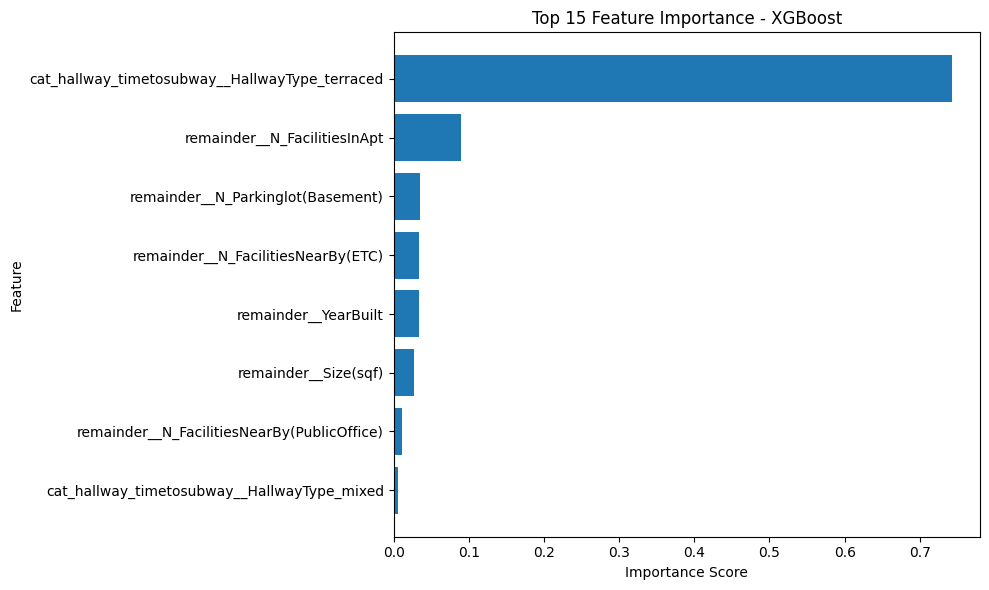

In [451]:

top_n = 8
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(
    y=top_features['feature'][::-1],
    width=top_features['importance'][::-1]
)

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance - XGBoost')
plt.tight_layout()
plt.show()


**Residual Analysis**

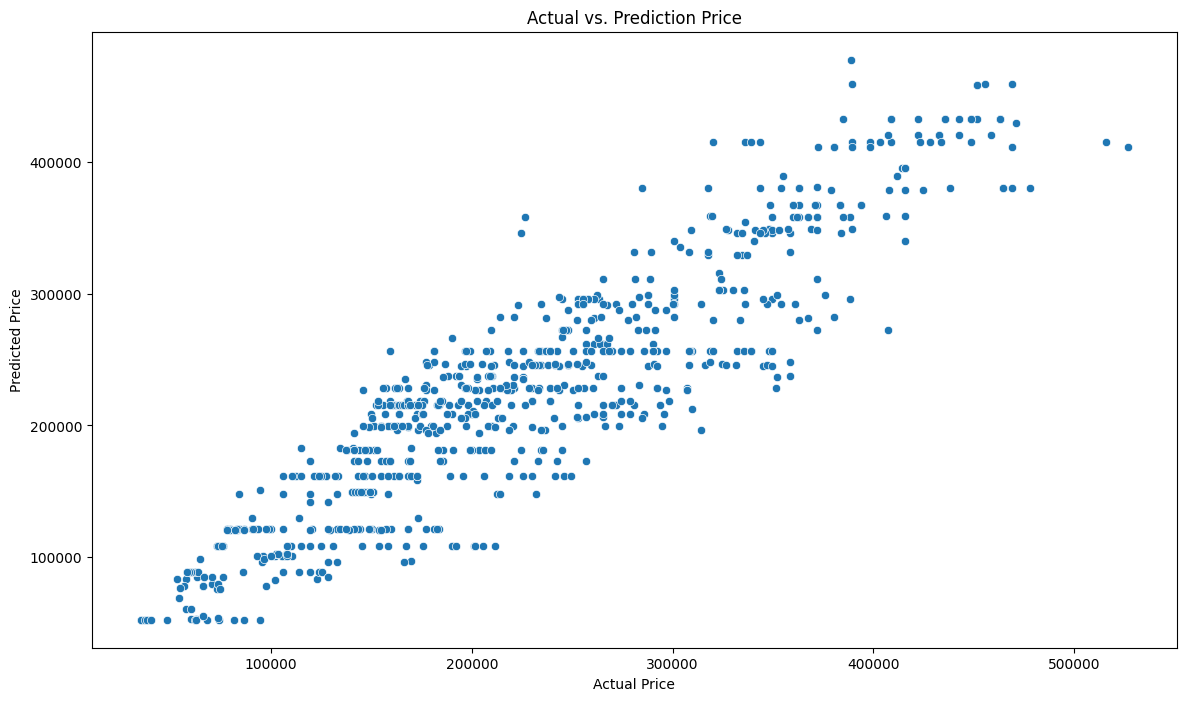

In [452]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

In [453]:

residuals = y_test - y_pred_xgb

In [454]:
residuals.describe()

,SalePrice
count,825.000000
mean,-1165.172704
std,41130.785643
min,-131138.468750
25%,-32302.242188
50%,-5820.703125
75%,20340.906250
max,134924.187500


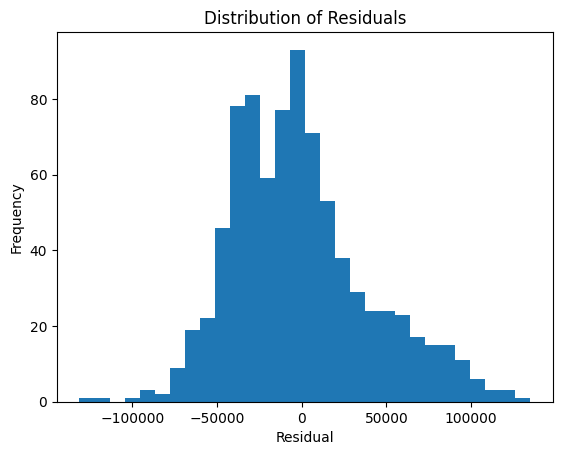

In [455]:
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

Distribusi residual bersifat kurang lebih simetris dan terpusat di sekitar nol, yang mengindikasikan bahwa kesalahan prediksi secara umum seimbang, dengan sedikit kecenderungan model melakukan underestimasi pada apartemen dengan harga tinggi.

##Conclusion

Projek ini berhasil mengembangkan model machine learning berbasis regresi untuk memprediksi harga apartemen di Daegu dengan memanfaatkan faktor internal properti serta faktor eksternal yang berkaitan dengan lokasi. Beberapa model regresi dievaluasi menggunakan metode cross-validation, dan model **XGB** menunjukkan performa terbaik pada tahap awal.

Melalui proses hyperparameter tuning menggunakan RandomizedSearchCV, model mengalami **penurunan akurasi prediksi** yang ditunjukkan oleh peningkatan nilai RMSE dan penurunan nilai R² pada data uji sehingga **base model XGB dipilih sebagai model terbaik**.

Berdasarkan visualisasi Actual vs Predicted Price, model XGBoost menunjukkan kemampuan yang cukup baik dalam menangkap pola hubungan antara harga aktual dan harga prediksi. Hal ini ditunjukkan oleh sebaran titik yang cenderung mengikuti garis diagonal, menandakan bahwa prediksi model secara umum mendekati nilai aktual. Namun terjadi penyebaran residual yang cukup lebar, terutama pada rentang harga menengah hingga tinggi. Adapun terjadi underestimasi pada apartemen dengan harga tinggi.

Secara keseluruhan, hasil projek ini menunjukkan bahwa pendekatan machine learning dapat digunakan secara efektif sebagai alat berbasis data untuk memperkirakan harga apartemen, sehingga dapat membantu individu maupun perusahaan dalam menetapkan harga yang lebih kompetitif, realistis, dan sesuai dengan kondisi pasar.

##Recommendation

**1. Rekomendasi Data**

- Menambahkan fitur temporal, seperti tahun transaksi, bulan, atau tren harga historis, untuk menangkap dinamika perubahan harga dari waktu ke waktu.

- Memperinci karakteristik bangunan premium, seperti kualitas material, renovasi, atau status apartemen (luxury vs non-luxury), untuk mengurangi kesalahan pada segmen harga tinggi.

**2. Rekomendasi Model**

- Melakukan eksperimen dengan model lain, seperti Random Forest dan LightGBM, yang dikenal efektif untuk data tabular dengan kompleksitas tinggi.

- Mengembangkan model terpisah berdasarkan segmen harga (low, medium, high) agar model lebih fokus pada karakteristik masing-masing segmen.

**3. Rekomendasi Bisnis**

- Siapa yang menggunakan model ini?

  - Tim pemasaran dan penjualan properti: untuk menentukan harga listing yang kompetitif.

  - Investor dan analis properti: sebagai alat pendukung dalam menilai kewajaran harga dan potensi investasi.

  - Manajemen platform properti: untuk memberikan rekomendasi harga otomatis kepada pemilik apartemen.

- Bagaimana maintenance model ini?

  - Retraining model disarankan setiap 3–6 bulan.

  - Retraining juga perlu dilakukan apabila terjadi:

    - Perubahan signifikan kondisi ekonomi (misalnya perubahan suku bunga)

    - Pergeseran tren permintaan properti

    - Masuknya data transaksi baru dalam jumlah besar

- Kapan model ini digunakan?

  - Saat penentuan harga awal (initial pricing) sebelum unit dipasarkan.

  - Saat evaluasi ulang harga, jika unit belum terjual dalam periode tertentu.

  - Saat analisis strategi pemasaran, untuk menentukan segmen harga dan target konsumen.

In [463]:
# Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_Apartment_Pricing_XGB.sav', 'wb'))

In [464]:
# Load model
# filename = 'Model_Apartment_Pricing_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))